# EDA

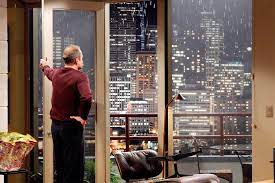

In [355]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [356]:
# importing raw data into a pandas data frame
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

# Data Preparation
First we want took a look at the data to make sense of it. Then we want to clean the data, fixing missing values, convert columns to correct data types, and transform the data. #

In [357]:
# check the data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [358]:
# check for data types and show the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

As we can see some we have some unexpected data types: 
- 'date', 'sqft_basement': object 
- 'yr_renovated'-float64

In [359]:
# calculate descriptive statistics from the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


Remarks:
- the max bedrooms = 33 ?
- the most recent house was built in which year? 
- Expectation: an average house have 2 bathrooms and the most recent house is built in 2015

In [360]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()

# check if the number of duplicates is 0
#df.duplicated(subset = ["id", "date"]).sum() == 0

False    21597
dtype: int64

## Data Types and Converting Data Types

Recall the data type of each column

In [361]:
# displaying data types per column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

There are some columns that need to be concerted to a different data type. 
In the following we will change some of the columns with their "right" data type.

In [362]:
# type of first date entry
type(df['date'][0])

str

In [363]:
# check for erroneous values in "date" column
incorrect_dates = []
for val in df.date:
    try:
        pd.to_datetime(val)
    except:
        incorrect_dates.append(val)

print("There is/are", len(incorrect_dates), "erroneous values in the date column.")

There is/are 0 erroneous values in the date column.


In [364]:
# change "date" dtype to datetime with format yyyymmdd
df['date'] = pd.to_datetime(df['date'])

# check "date" dtype
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [365]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,2015-01-15,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,2015-04-15,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [366]:
# type of first 'sqft_basement' entry
type(df['sqft_basement'][0])

str

In [367]:
# change data type of sqft_basement to float
df = df.astype({'sqft_basement': float})

ValueError: could not convert string to float: '?'

We get an error message. This help us to determine why our column cannot be assigned to the data type 'float'. With this error message we can see that in the 'sqft_basement' column is more than just numbers. We will check out how many incorrect values we have in the 'sqft_basement'.

In [ ]:
# display how man incorrect values are in the 'sqft_basement'
incorrect_values = []
for val in df.sqft_basement:
    try:
        float(val)
    except:
        incorrect_values.append(val)

print(len(incorrect_values))

454


We can see that there are 454 irrelevant values in the 'sqft_basement'. In the next step we will check what they are.

In [ ]:
# display the unique irrelevant values
set(incorrect_values)

{'?'}

We can see that somewhere in this column is a ?-character. 454 times. Let's see where.

In [ ]:
# display rows with "?" in precipitation column 
print(df.query('sqft_basement == "?"'))

               id       date       price  bedrooms  bathrooms  sqft_living  \
6      1321400060 2014-06-27  257500.000         3      2.250         1715   
18       16000397 2014-12-05  189000.000         2      1.000         1200   
42     7203220400 2014-07-07  861990.000         5      2.750         3595   
79     1531000030 2015-03-23  720000.000         4      2.500         3450   
112    2525310310 2014-09-16  272500.000         3      1.750         1540   
...           ...        ...         ...       ...        ...          ...   
21442  3226049565 2014-07-11  504600.000         5      3.000         2360   
21447  1760650900 2014-07-21  337500.000         4      2.500         2330   
21473  6021503707 2015-01-20  352500.000         2      2.500          980   
21519  2909310100 2014-10-15  332000.000         4      2.500         2380   
21581   191100405 2015-04-21 1580000.000         4      3.250         3410   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_abo

In the next step we will replace the ?-character with the most common value in the column. 

In [ ]:
#replace the `?`-character with the most common value
most_common_val = df.sqft_basement.value_counts().sort_values(ascending = False).index[0]

df['sqft_basement'] = df.sqft_basement.replace('?', most_common_val)

# display how many ?-characters are in the 'swft_basement' column
(df.sqft_basement == "?").sum()

0

In [ ]:
# change data type of sqft_basement to int
df = df.astype({'sqft_basement': int})
print(df.sqft_basement.dtype)

int64


In [ ]:
# change data type of 'bathrooms' and 'floors' to int
df.bathrooms = np.ceil(df.bathrooms).astype(int)
df.floors = np.ceil(df.floors).astype(int)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Missing Data

Now we want to check for missing values. 

In [ ]:
# display number of missing values per column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As we can see 'waterfront', 'view', and 'yr_renovated' are the only columns with missing values. Let display it in a bar chart. 

In [ ]:
# plotting percentage of missing values per column
msno.bar(df)

We see that three columns contain missing values. More than 20% of the data is missing in the column 'yr_renovated'. About 10% in the data is missing in the column 'waterfront and about 1% in the column 'view'. In the following we will take a closer look of the missing values in these three columns. 

In [ ]:
print(f"numbers of rows : {df.shape[0]}")
print(f"missing values in waterfront : {round(df.waterfront.isna().sum()/df.shape[0]*100,2)} %")
print(f"missing values in view : {round(df.view.isna().sum()/df.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df.yr_renovated.isna().sum().sum()/(df.shape[0]*df.shape[1])*100,2)} %")

numbers of rows : 21597
missing values in waterfront : 11.0 %
missing values in view : 0.29 %
missing values in yr_renovated : 0.85 %


And the most common values in each of the three columns?

In [ ]:
# display the most common values
for col in ["waterfront", "view", "yr_renovated"]:
    print(col)
    print(df[col].value_counts(normalize = True).sort_values(ascending = False).head(2))

waterfront
0.000   0.992
1.000   0.008
Name: waterfront, dtype: float64
view
0.000   0.902
2.000   0.044
Name: view, dtype: float64
yr_renovated
0.000      0.958
2014.000   0.004
Name: yr_renovated, dtype: float64


The output above shows that '0' is the most common value for the three columns 'waterfront', 'view' and 'yr_renovated'. In the following we will take care about this missing data. 

### Imputing Data

In the following we want to replace missing values with sensible values. 

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1,1180,5650,1,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,3,2570,7242,2,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1,770,10000,1,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3,1960,5000,1,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2,1680,8080,1,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In the following we fill the missing values of each of the three columns by randomly choosing a unique value given the appropriate weights.

In [ ]:
def replace_missing(val, probs):
    if np.isnan(val):
        return np.random.choice(probs.index, p = probs)
    else:
        return val
        
for col in ["waterfront", "view", "yr_renovated"]:
    # get weights of unique values
    unique_p = df[col].value_counts(normalize = True)
    # apply function above
    df[col] = df[col].apply(replace_missing, args = (unique_p,))

# check if there are missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Recall the data type of each column again.

In [ ]:
# displaying data types per column again
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

There are still some columns that need to be converted to a different data type. Since there are no more missing values in the columns 'waterfront', 'view' and 'yr_renoveated' we can convert the data type.

In [ ]:
# converting columns to another data type
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)

df.dtypes